<a href="https://colab.research.google.com/github/pandyah5/aps360-project/blob/baseline/baseline/mediapipe_bbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# download the dataset

from google.colab import files
files.upload() # expire any previous token(s) and upload recreated token

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download andrewmvd/face-mask-detection
!unzip -q face-mask-detection.zip -d face-mask-detection # outputs supressed

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
 94% 375M/398M [00:07<00:00, 44.8MB/s]
100% 398M/398M [00:07<00:00, 55.7MB/s]


In [2]:
!pip install mediapipe

     |████████████████████████████████| 32.7 MB 1.3 MB/s 


In [3]:
import cv2
from google.colab.patches import cv2_imshow
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection

# enable auto debugger
import pdb
%pdb on  

Automatic pdb calling has been turned ON


In [4]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

In [7]:
def get_bbox_mediapipe(image, show=False):

  # image: cv2 BGR image

  results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  # Draw face detections of each face.
  if not results.detections:
    print("No detections")
    return None
    
  if show:
    annotated_image = image.copy()

  bboxes = list()

  for detection in results.detections:
    if show:
      mp_drawing.draw_detection(annotated_image, detection)

    xmin, ymin, width, height = (detection.location_data.relative_bounding_box.xmin, 
                    detection.location_data.relative_bounding_box.ymin,
                    detection.location_data.relative_bounding_box.width,
                    detection.location_data.relative_bounding_box.height)
    
    bboxes.append([xmin, ymin, xmin+width, ymin+height])
    
    if show:
      cv2_imshow(annotated_image)

    return bboxes

Face detections of /content/face-mask-detection/images/maksssksksss1.png:


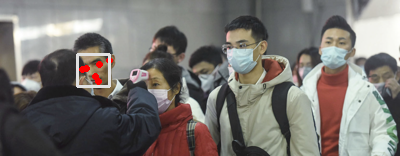

In [8]:
fname = "/content/face-mask-detection/images/maksssksksss1.png"
images = {fname: cv2.imread(fname)}

with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=1) as face_detection:


  for name, image in images.items():

    # Draw face detections of each face.
    print(f'Face detections of {name}:')

    get_bbox_mediapipe(image, show=True)
